In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report as Clf
from sklearn.metrics import confusion_matrix as Cfm
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score as AS
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
data = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loanS = pd.get_dummies(data['Loan_Status'], drop_first = True, prefix = 'LS')
loanS.head(2)

,LS_Y
0,1
1,0


In [4]:
data[loanS.columns] = loanS
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LS_Y
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0


<AxesSubplot:xlabel='LS_Y', ylabel='count'>

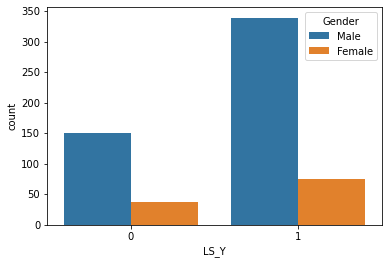

In [5]:
sns.countplot(x = 'LS_Y', hue = 'Gender', data = data)

<AxesSubplot:xlabel='LS_Y', ylabel='count'>

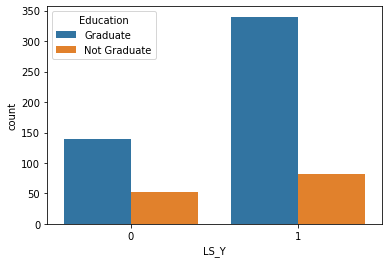

In [6]:
sns.countplot(x = 'LS_Y', hue = 'Education', data = data)

<AxesSubplot:xlabel='LS_Y', ylabel='count'>

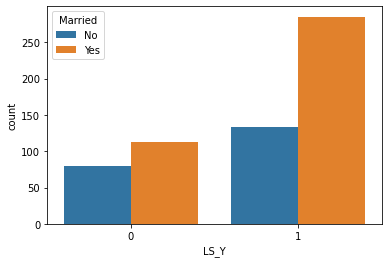

In [7]:
sns.countplot(x = 'LS_Y', hue = 'Married', data = data)

<AxesSubplot:xlabel='LS_Y', ylabel='count'>

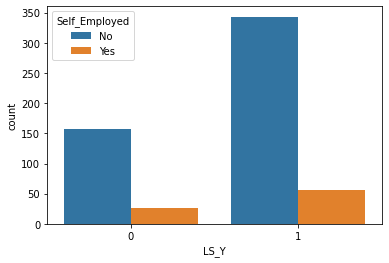

In [8]:
sns.countplot(x = 'LS_Y', hue = 'Self_Employed', data = data)

<AxesSubplot:xlabel='LS_Y', ylabel='count'>

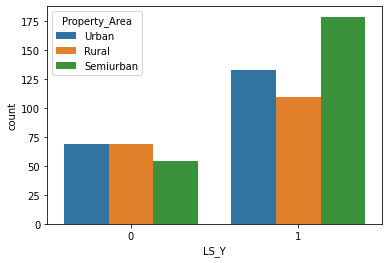

In [9]:
sns.countplot(x = 'LS_Y', hue = 'Property_Area', data = data)

<AxesSubplot:xlabel='LS_Y', ylabel='count'>

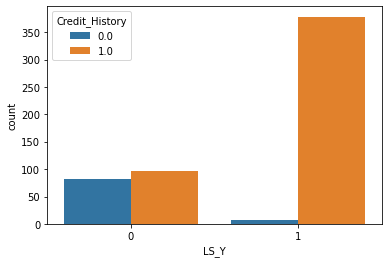

In [10]:
sns.countplot(x = 'LS_Y', hue = 'Credit_History', data = data)

<AxesSubplot:ylabel='Frequency'>

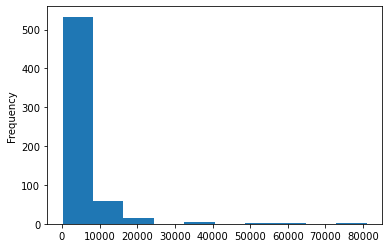

In [11]:
data['ApplicantIncome'].plot.hist()

<AxesSubplot:xlabel='LS_Y', ylabel='count'>

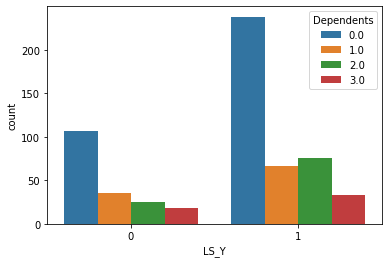

In [12]:
sns.countplot(x = 'LS_Y', hue = 'Dependents', data = data)

In [13]:
Gen = pd.get_dummies(data['Gender'], drop_first = True, prefix = 'G')
Employed = pd.get_dummies(data['Self_Employed'], drop_first = True, prefix = 'SE')
Mar = pd.get_dummies(data['Married'], drop_first = True, prefix = 'M')
Edu = pd.get_dummies(data['Education'], drop_first = True, prefix = 'E')

In [14]:
data[Gen.columns] = Gen
data[Employed.columns] = Employed
data[Mar.columns] = Mar
data[Edu.columns] = Edu

In [15]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LS_Y,G_Male,SE_Yes,M_Yes,E_Not Graduate
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,1,0,0,0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0,1,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,1,1,0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0,1,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,1,0,0,0


In [16]:
data.drop(['Gender','Married','Education','Self_Employed',], axis = 1, inplace = True)

In [17]:
data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LS_Y,G_Male,SE_Yes,M_Yes,E_Not Graduate
0,LP001002,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y,1,1,0,0,0
1,LP001003,1.0,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0,1,0
2,LP001005,0.0,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,1,1,0
3,LP001006,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0,1,1
4,LP001008,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y,1,1,0,0,0


In [18]:
data.drop(['Loan_ID','CoapplicantIncome','Loan_Amount_Term','Property_Area','Loan_Status'], axis = 1, inplace = True)

In [19]:
data.head()

,Dependents,ApplicantIncome,LoanAmount,Credit_History,LS_Y,G_Male,SE_Yes,M_Yes,E_Not Graduate
0,0.0,5849,NaN,1.0,1,1,0,0,0
1,1.0,4583,128.0,1.0,0,1,0,1,0
2,0.0,3000,66.0,1.0,1,1,1,1,0
3,0.0,2583,120.0,1.0,1,1,0,1,1
4,0.0,6000,141.0,1.0,1,1,0,0,0


In [20]:
Dep = pd.get_dummies(data['Dependents'], prefix = 'D')

In [21]:
data[Dep.columns] = Dep


In [22]:
data.drop(['Dependents'], axis = 1, inplace = True)


In [23]:
data.head()

,ApplicantIncome,LoanAmount,Credit_History,LS_Y,G_Male,SE_Yes,M_Yes,E_Not Graduate,D_0.0,D_1.0,D_2.0,D_3.0
0,5849,NaN,1.0,1,1,0,0,0,1,0,0,0
1,4583,128.0,1.0,0,1,0,1,0,0,1,0,0
2,3000,66.0,1.0,1,1,1,1,0,1,0,0,0
3,2583,120.0,1.0,1,1,0,1,1,1,0,0,0
4,6000,141.0,1.0,1,1,0,0,0,1,0,0,0


In [24]:
mean = data['LoanAmount'].mean()
data['LoanAmount'].replace(np.NaN, mean, inplace = True)

In [25]:
data.head()

,ApplicantIncome,LoanAmount,Credit_History,LS_Y,G_Male,SE_Yes,M_Yes,E_Not Graduate,D_0.0,D_1.0,D_2.0,D_3.0
0,5849,146.412162,1.0,1,1,0,0,0,1,0,0,0
1,4583,128.000000,1.0,0,1,0,1,0,0,1,0,0
2,3000,66.000000,1.0,1,1,1,1,0,1,0,0,0
3,2583,120.000000,1.0,1,1,0,1,1,1,0,0,0
4,6000,141.000000,1.0,1,1,0,0,0,1,0,0,0


In [26]:
mode = 1.0
data["Credit_History"].replace(np.NaN, mode, inplace=True)
data.head()

,ApplicantIncome,LoanAmount,Credit_History,LS_Y,G_Male,SE_Yes,M_Yes,E_Not Graduate,D_0.0,D_1.0,D_2.0,D_3.0
0,5849,146.412162,1.0,1,1,0,0,0,1,0,0,0
1,4583,128.000000,1.0,0,1,0,1,0,0,1,0,0
2,3000,66.000000,1.0,1,1,1,1,0,1,0,0,0
3,2583,120.000000,1.0,1,1,0,1,1,1,0,0,0
4,6000,141.000000,1.0,1,1,0,0,0,1,0,0,0


In [27]:
data.isnull().sum()

ApplicantIncome    0
LoanAmount         0
Credit_History     0
LS_Y               0
G_Male             0
SE_Yes             0
M_Yes              0
E_Not Graduate     0
D_0.0              0
D_1.0              0
D_2.0              0
D_3.0              0
dtype: int64

In [28]:
X = data.drop('LS_Y', axis = 1)
y = data['LS_Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
Sc_X = StandardScaler()
X_train = Sc_X.fit_transform(X_train)
X_test = Sc_X.transform(X_test)

In [30]:
model = LogisticRegression(random_state = 0, max_iter = 1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [31]:
y_pred = model.predict(X_test)

In [37]:
AS(y_test,y_pred)*100

82.92682926829268

In [36]:
print(f1_score(y_test, y_pred)*100)

89.34010152284264


In [34]:
Cfm(y_test, y_pred)

array([[14, 19],
       [ 2, 88]], dtype=int64)

In [35]:
data.head(10)

,ApplicantIncome,LoanAmount,Credit_History,LS_Y,G_Male,SE_Yes,M_Yes,E_Not Graduate,D_0.0,D_1.0,D_2.0,D_3.0
0,5849,146.412162,1.0,1,1,0,0,0,1,0,0,0
1,4583,128.000000,1.0,0,1,0,1,0,0,1,0,0
2,3000,66.000000,1.0,1,1,1,1,0,1,0,0,0
3,2583,120.000000,1.0,1,1,0,1,1,1,0,0,0
4,6000,141.000000,1.0,1,1,0,0,0,1,0,0,0
5,5417,267.000000,1.0,1,1,1,1,0,0,0,1,0
6,2333,95.000000,1.0,1,1,0,1,1,1,0,0,0
7,3036,158.000000,0.0,0,1,0,1,0,0,0,0,1
8,4006,168.000000,1.0,1,1,0,1,0,0,0,1,0
9,12841,349.000000,1.0,0,1,0,1,0,0,1,0,0
